In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Flatten, Dropout

# Uploading file

In [ ]:
# Load the dataset
df = pd.read_excel('/content/D20 to D24_final (1).xlsx')

In [ ]:
df.head()

,Year,Country2020,Score,LabourforceparticipationrateRank,LabourforceparticipationrateScore,WageequalityforsimilarworkRank,Wageequalityforsimilarwork Score,EstimatedearnedincomeRank,Estimatedearnedincome Score,LegislatorsseniorofficialsandmanagersRank,...,SexratioatbirthScore,HealthylifeexpectancyyearsRank,HealthylifeexpectancyyearsScore,Womeninparliament Rank,Womeninparliament Score,WomeninministerialpositionsRank,WomeninministerialpositionsScore,Yearswithfemaleormale headofstatelast50Rank,Yearswithfemaleormale headofstatelast50Score,Country_encoded
0,2020,Iceland,0.877,73.0,0.825,131.0,0.502,73.0,0.621,34.0,...,0.944,1,1.060,127.0,0.144,126,0.083,73.0,0.000,58
1,2020,Norway,0.842,16.0,0.949,19.0,0.745,12.0,0.791,54.0,...,0.944,106,1.035,14.0,0.690,15,0.727,5.0,0.462,100
2,2020,Finland,0.832,13.0,0.959,9.0,0.798,33.0,0.720,77.0,...,0.944,70,1.053,7.0,0.887,20,0.600,12.0,0.316,47
3,2020,Sweden,0.820,14.0,0.955,50.0,0.694,15.0,0.769,35.0,...,0.943,127,1.027,6.0,0.897,1,1.000,73.0,0.000,123
4,2020,Nicaragua,0.804,120.0,0.627,113.0,0.560,14.0,0.774,57.0,...,0.944,1,1.060,11.0,0.804,1,1.000,21.0,0.155,97


In [ ]:
print(df.columns)

Index(['Rank', 'Year', 'Country', 'Score', 'LabourforceparticipationrateRank',
       'LabourforceparticipationrateScore', 'WageequalityforsimilarworkRank',
       'Wageequalityforsimilarwork Score', 'EstimatedearnedincomeRank',
       'Estimatedearnedincome Score',
       'LegislatorsseniorofficialsandmanagersRank',
       'Legislatorsseniorofficialsandmanagers Score',
       'ProfessionalandtechnicalworkersRank',
       'ProfessionalandtechnicalworkersScore', 'LiteracyrateRank',
       'LiteracyrateScore', 'EnrolmentinprimaryeducationRank',
       'EnrolmentinprimaryeducationScore', 'EnrolmentinsecondaryeducationRank',
       'EnrolmentinsecondaryeducationScore',
       'EnrolmentintertiaryeducationRank', 'EnrolmentintertiaryeducationScore',
       'SexratioatbirthRank', 'SexratioatbirthScore',
       'HealthylifeexpectancyyearsRank', 'HealthylifeexpectancyyearsScore',
       'Womeninparliament Rank', 'Womeninparliament Score',
       'WomeninministerialpositionsRank', 'Womeninminist

In [ ]:
# rows and columns
df.shape

(695, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 32 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Rank                                          695 non-null    int64  
 1   Year                                          695 non-null    int64  
 2   Country                                       695 non-null    object 
 3   Score                                         695 non-null    float64
 4   LabourforceparticipationrateRank              695 non-null    float64
 5   LabourforceparticipationrateScore             695 non-null    object 
 6   WageequalityforsimilarworkRank                617 non-null    float64
 7   Wageequalityforsimilarwork Score              627 non-null    object 
 8   EstimatedearnedincomeRank                     692 non-null    float64
 9   Estimatedearnedincome Score                   692 non-null    flo

In [ ]:
# Checking for Null values
df.isna().sum()

,0
Rank,0
Year,0
Country,0
Score,0
LabourforceparticipationrateRank,0
LabourforceparticipationrateScore,0
WageequalityforsimilarworkRank,78
Wageequalityforsimilarwork Score,68
EstimatedearnedincomeRank,3
Estimatedearnedincome Score,3


# Data preprocessing

In [ ]:
# Handling Missing Values
## Option 1: Drop columns with too many missing values (e.g., threshold 50%)
thresh = len(df) * 0.5
df = df.dropna(thresh=thresh, axis=1)

## Option 2: Fill missing numerical values with median
df.fillna(df.median(numeric_only=True), inplace=True)

## Option 3: Fill missing categorical values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-63-4c0758f81a17>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# Encoding Categorical Variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    # Convert the column to string type before encoding
    df[col] = df[col].astype(str)
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders if needed later

In [ ]:
# Normalize numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
df[numerical_cols] = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()

In [ ]:
# Summary statistics
print("\nSummary Statistics:")
display(df.describe(include='all'))


Summary Statistics:


,Rank,Year,Country,Score,LabourforceparticipationrateRank,LabourforceparticipationrateScore,WageequalityforsimilarworkRank,Wageequalityforsimilarwork Score,EstimatedearnedincomeRank,Estimatedearnedincome Score,...,SexratioatbirthRank,SexratioatbirthScore,HealthylifeexpectancyyearsRank,HealthylifeexpectancyyearsScore,Womeninparliament Rank,Womeninparliament Score,WomeninministerialpositionsRank,WomeninministerialpositionsScore,Yearswithfemaleormale headofstatelast50Rank,Yearswithfemaleormale headofstatelast50Score
count,6.950000e+02,695.000000,6.950000e+02,6.950000e+02,6.950000e+02,6.950000e+02,6.950000e+02,6.950000e+02,6.950000e+02,6.950000e+02,...,6.950000e+02,6.950000e+02,6.950000e+02,6.950000e+02,6.950000e+02,6.950000e+02,6.950000e+02,6.950000e+02,6.950000e+02,6.950000e+02
mean,-4.089455e-17,0.000000,-1.610223e-16,-1.257507e-15,-1.533545e-17,-9.201273e-17,1.533545e-16,6.006386e-17,1.277955e-16,-4.012777e-16,...,7.156546e-17,7.492648e-15,2.811500e-17,-9.073477e-16,-2.044727e-17,-3.578273e-17,1.431309e-16,-5.111818e-18,-4.089455e-17,7.156546e-17
std,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.693521e+00,-1.413196,-1.721884e+00,-2.532079e+00,-1.694961e+00,-2.011790e+00,-1.789300e+00,-1.870004e+00,-1.272020e+00,-3.577619e+00,...,-5.825999e-01,-5.962387e+00,-1.330691e+00,-1.116763e+01,-1.703382e+00,-8.152422e-02,-1.563745e+00,-5.274418e-02,-2.317282e+00,-7.213594e-01
25%,-8.766807e-01,-0.706598,-8.518486e-01,-6.311262e-01,-8.524421e-01,-8.352533e-01,-8.007982e-01,-6.714483e-01,-6.509654e-01,-4.509235e-01,...,-5.825999e-01,2.026462e-01,-1.330691e+00,-1.122182e-01,-8.551237e-01,-6.667941e-02,-8.104917e-01,-4.681318e-02,-7.541127e-01,-7.213594e-01
50%,1.017483e-02,0.000000,-5.981057e-03,-1.372268e-02,1.115292e-02,1.451940e-01,-9.996770e-03,-1.325003e-01,-2.991090e-02,1.362495e-01,...,-5.825999e-01,3.089399e-01,1.357727e-01,1.073529e-01,4.915966e-03,-5.735150e-02,8.262149e-03,-4.147527e-02,6.060475e-01,-7.213594e-01
75%,8.503538e-01,0.706598,8.640542e-01,6.361758e-01,8.514075e-01,8.641886e-01,7.949261e-01,8.086477e-01,6.170209e-01,6.353465e-01,...,1.363643e+00,3.089399e-01,8.592280e-01,3.049670e-01,8.413929e-01,-4.159931e-02,7.833491e-01,-3.297417e-02,8.090565e-01,5.986637e-01
max,1.853901e+00,1.413196,1.782425e+00,3.625709e+00,1.785024e+00,1.594077e+00,2.023493e+00,1.975028e+00,1.789441e+01,2.294110e+00,...,2.336764e+00,5.623624e+00,1.641342e+00,6.299260e+00,1.854590e+00,1.951798e+01,8.872637e+00,2.632046e+01,1.012066e+00,2.605099e+00


# Exploratory Data Analysis

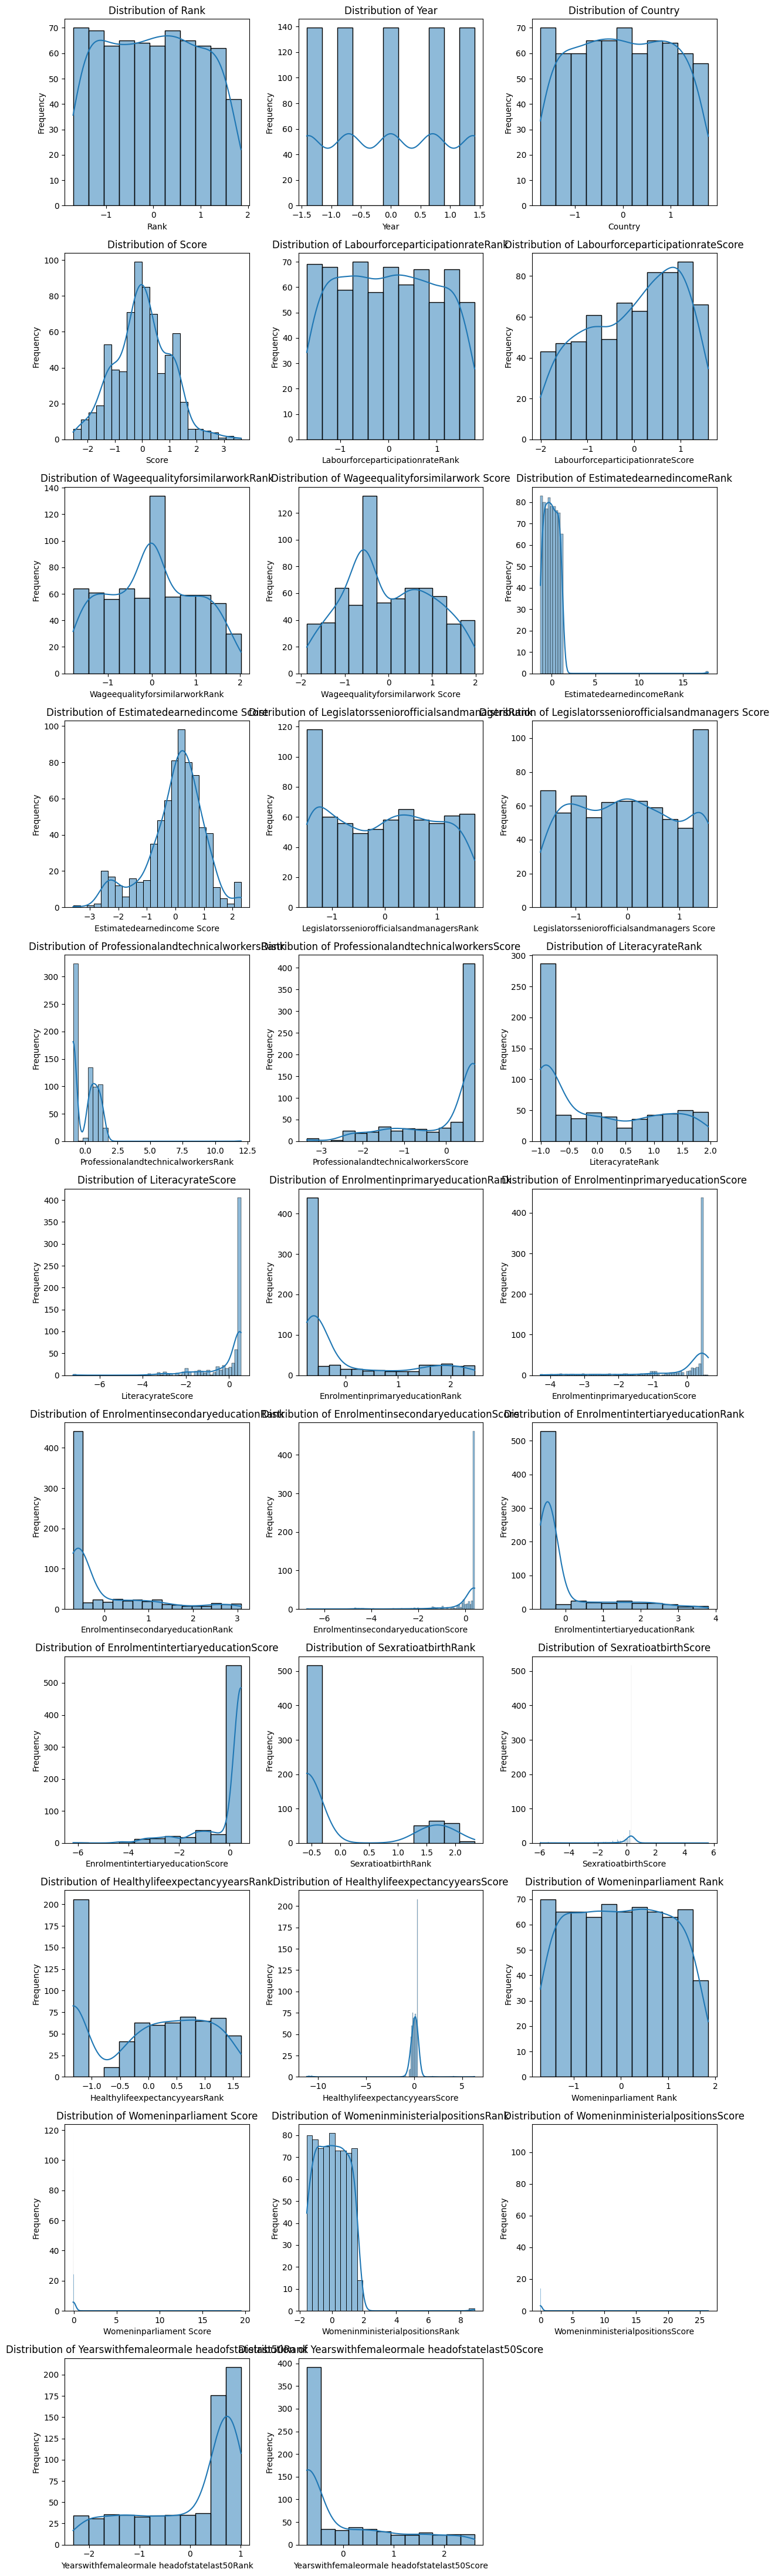

In [ ]:
# Histogram for numerical features
num_cols = df.select_dtypes(include=['number']).columns
num_features = len(num_cols)
cols = 3  # Number of columns per row
rows = (num_features // cols) + (num_features % cols > 0)

plt.figure(figsize=(cols * 4, rows * 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], bins='auto', kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

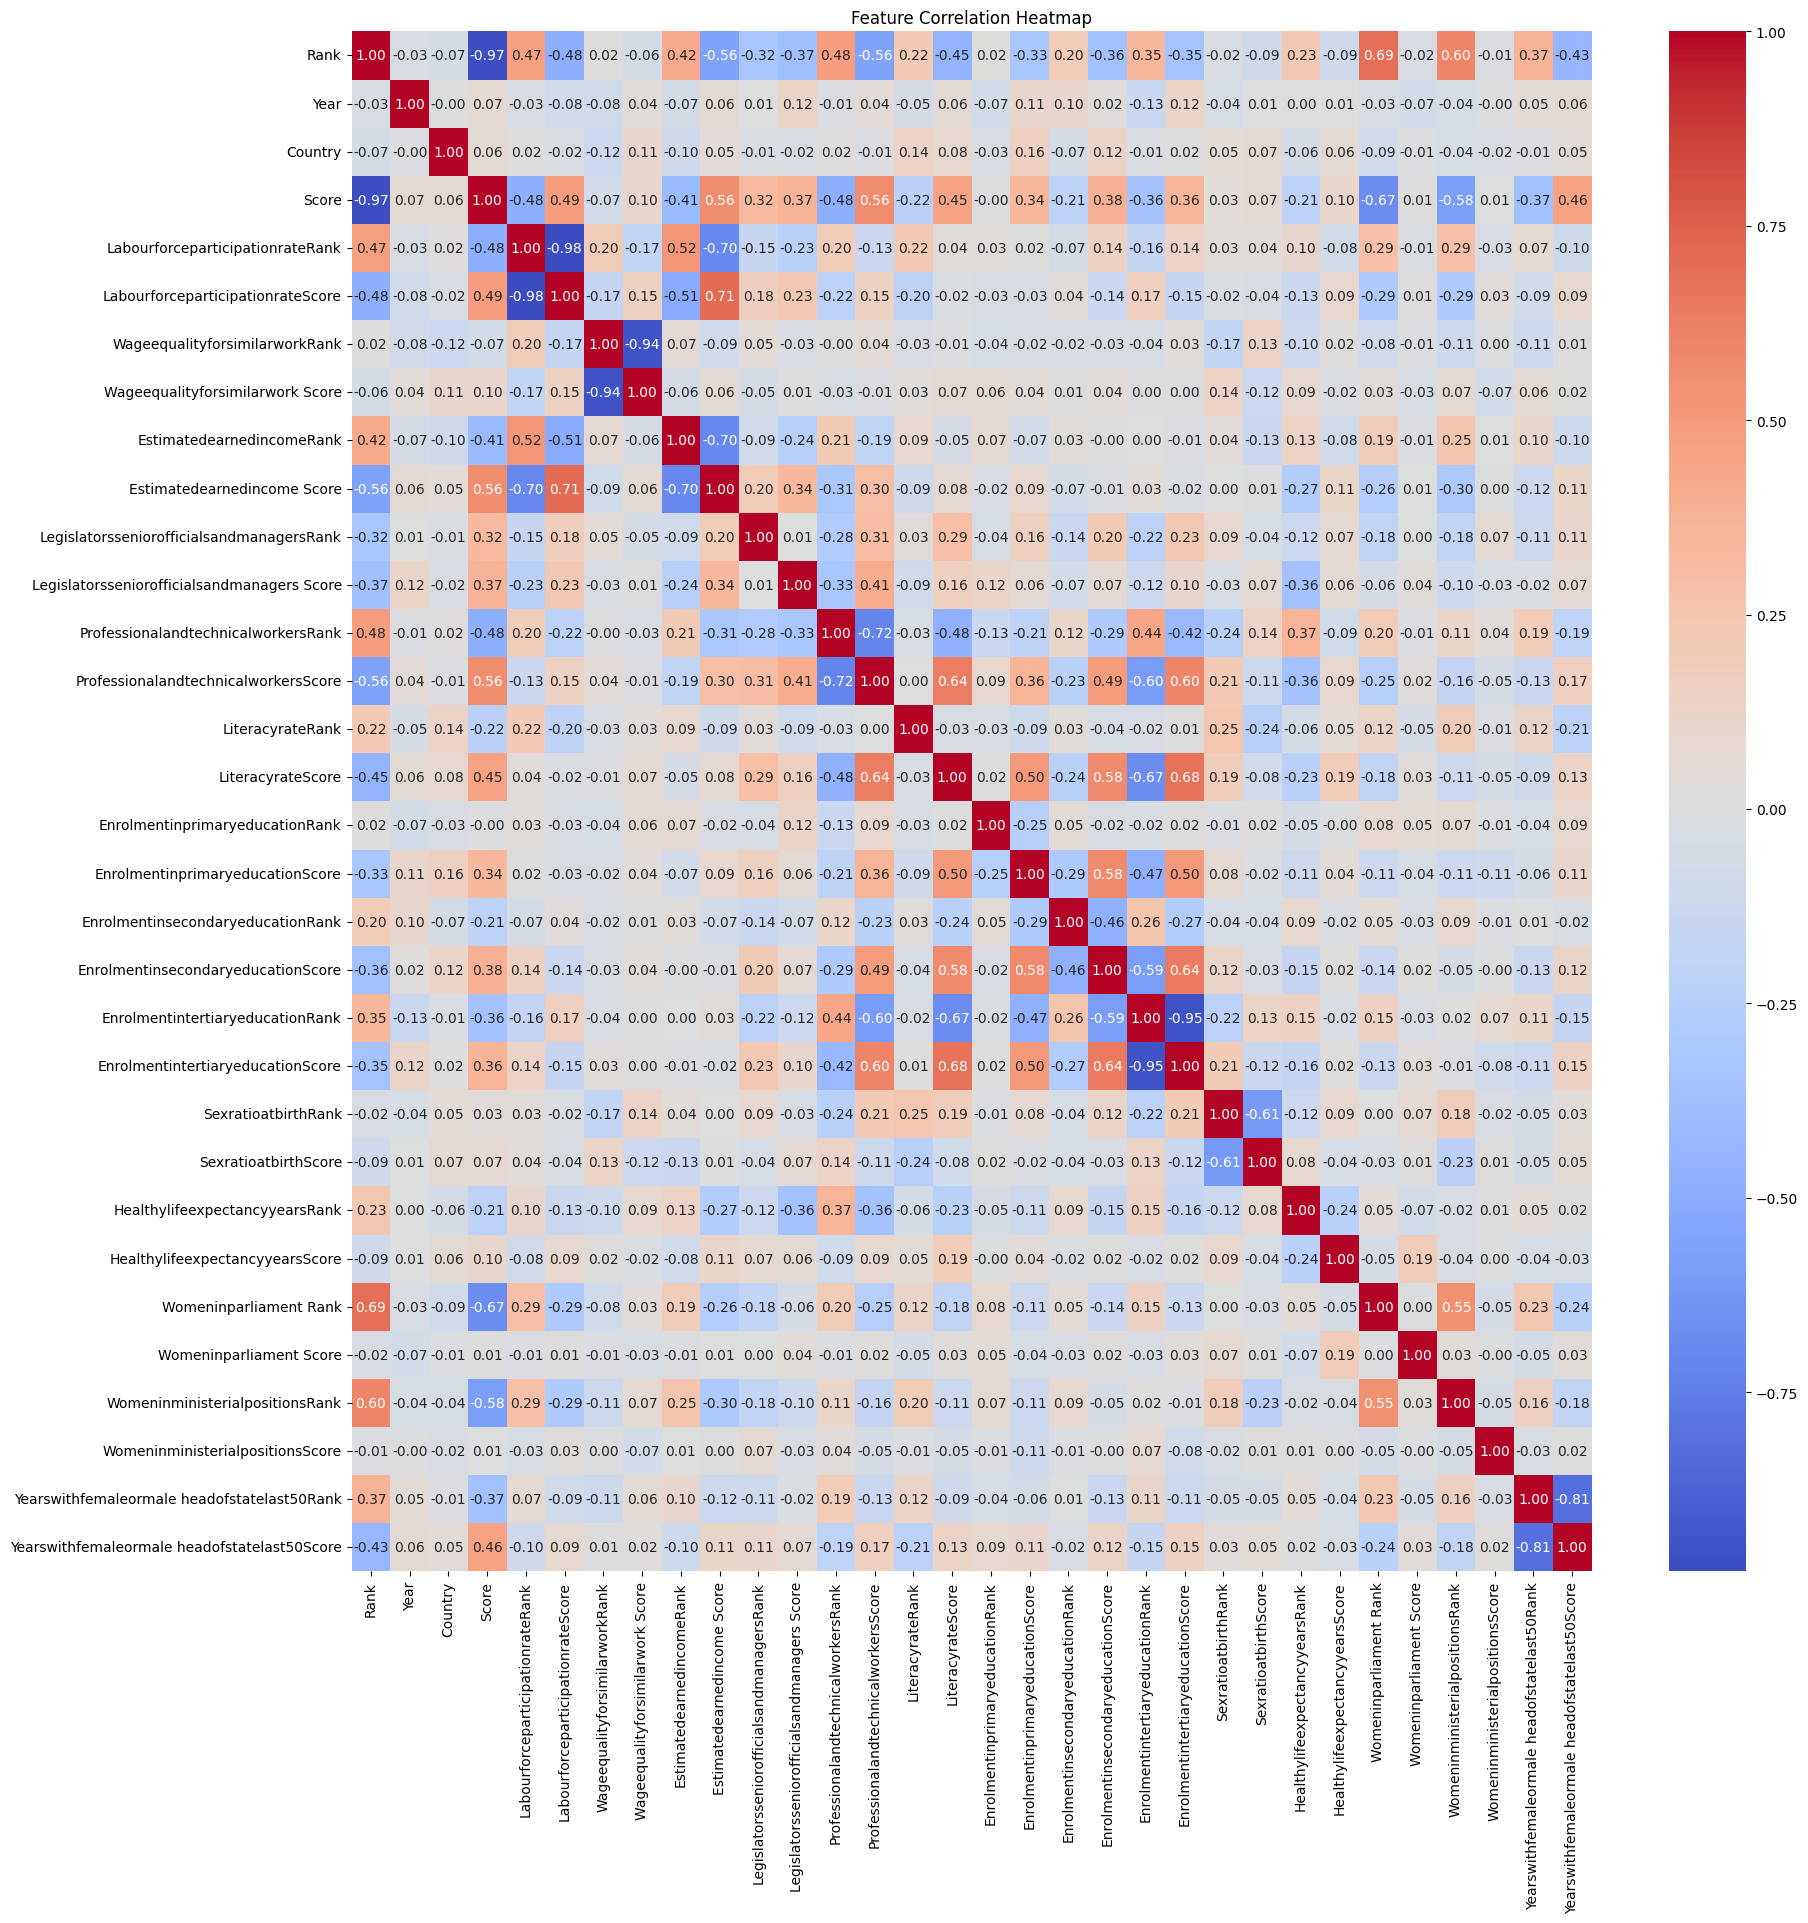

In [ ]:
# Correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

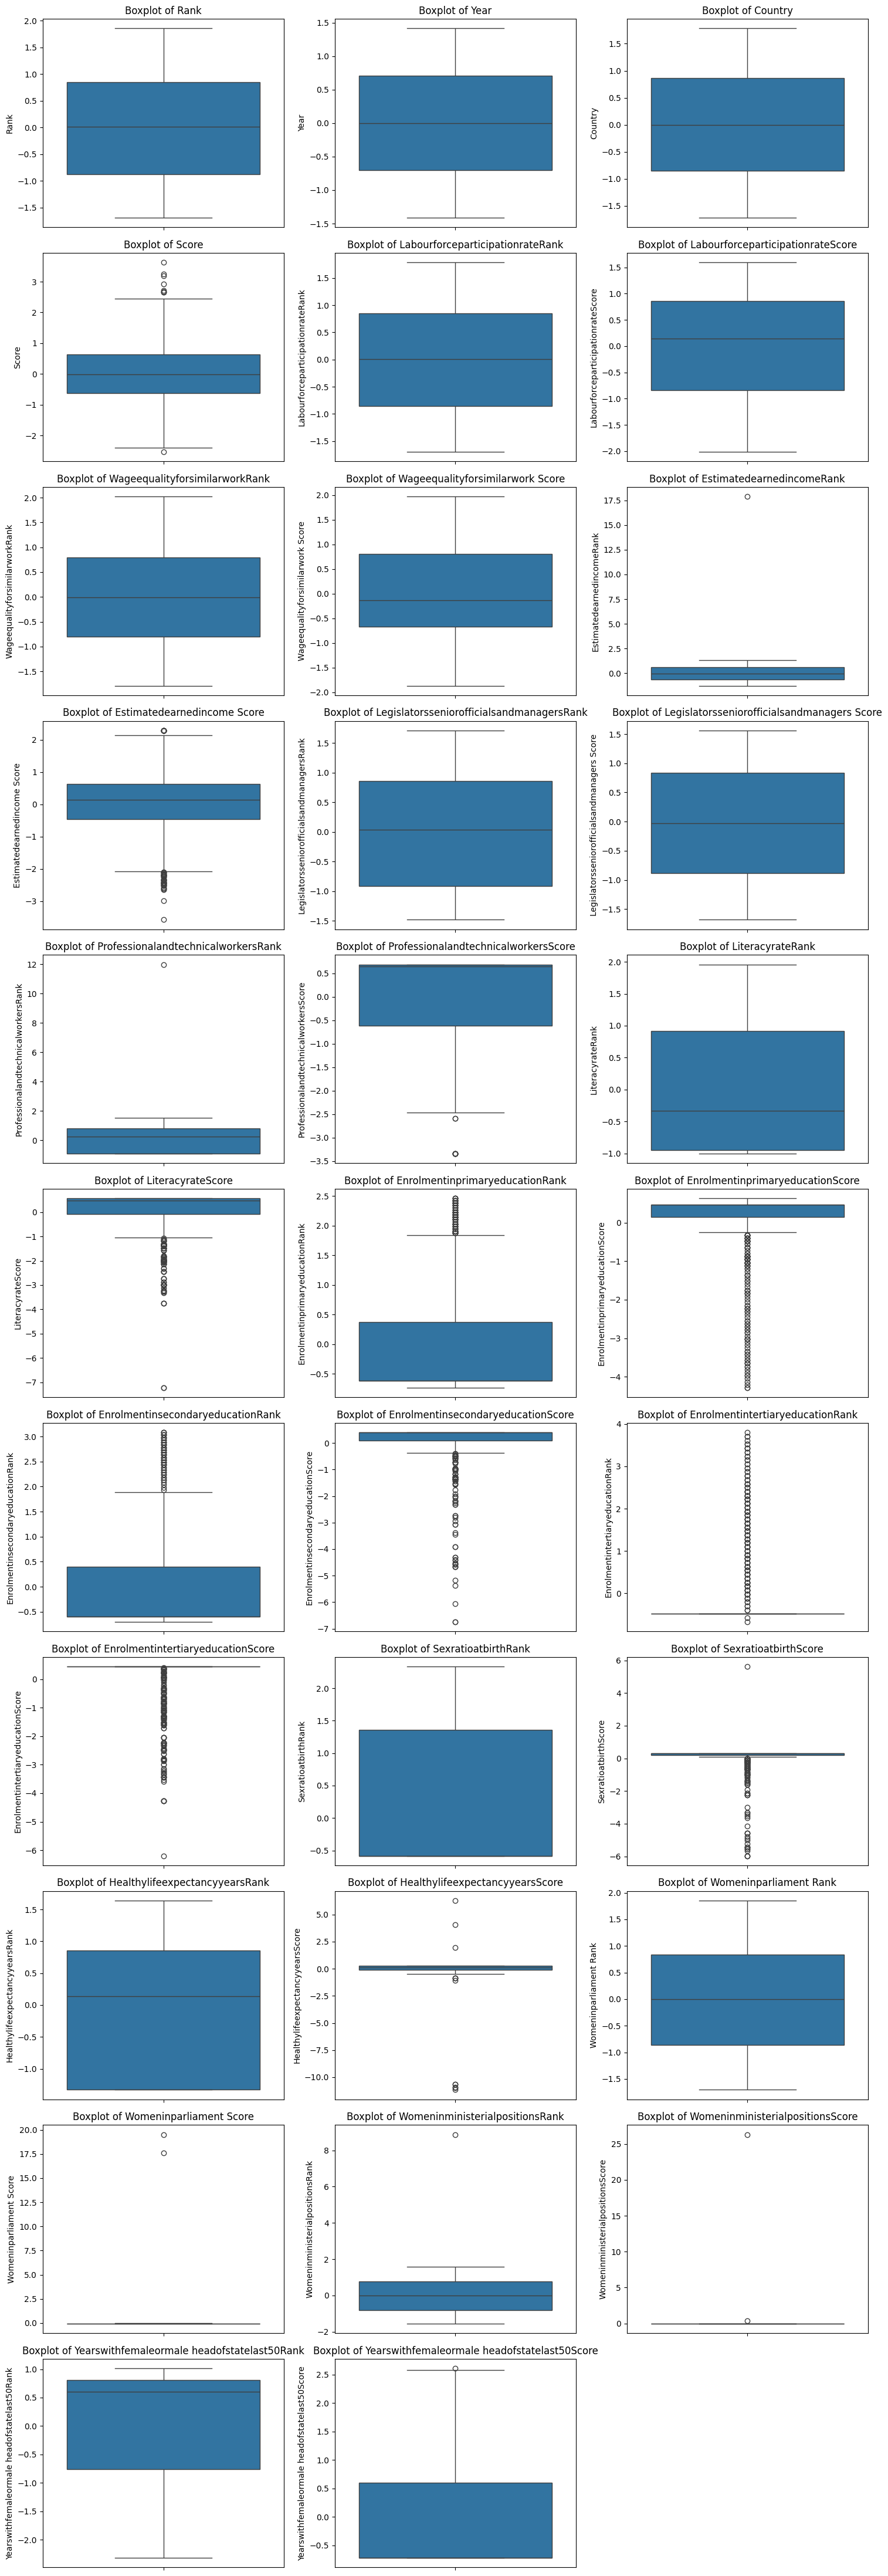

In [ ]:
# Boxplot of numerical features to find outliers
plt.figure(figsize=(cols * 5, rows * 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [ ]:
# Detecting Outliers using IQR Method
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))
print("\nNumber of outliers per column:")
print(outlier_mask.sum())


Number of outliers per column:
Rank                                              0
Year                                              0
Country                                           0
Score                                             9
LabourforceparticipationrateRank                  0
LabourforceparticipationrateScore                 0
WageequalityforsimilarworkRank                    0
Wageequalityforsimilarwork Score                  0
EstimatedearnedincomeRank                         1
Estimatedearnedincome Score                      57
LegislatorsseniorofficialsandmanagersRank         0
Legislatorsseniorofficialsandmanagers Score       0
ProfessionalandtechnicalworkersRank               1
ProfessionalandtechnicalworkersScore              9
LiteracyrateRank                                  0
LiteracyrateScore                                95
EnrolmentinprimaryeducationRank                  71
EnrolmentinprimaryeducationScore                130
EnrolmentinsecondaryeducationRan

In [ ]:
# Removing Outliers using IQR Method Iteratively
while True:
    Q1 = df[num_cols].quantile(0.25)
    Q3 = df[num_cols].quantile(0.75)
    IQR = Q3 - Q1
    outlier_mask = (df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))
    num_outliers = outlier_mask.sum().sum()

    if num_outliers == 0:
        break  # Stop when no outliers remain

    print(f"Removing {num_outliers} outliers...")
    df = df[~outlier_mask.any(axis=1)]

print("\nAll outliers removed!")

Removing 1011 outliers...
Removing 303 outliers...
Removing 44 outliers...
Removing 48 outliers...
Removing 7 outliers...
Removing 2 outliers...

All outliers removed!


In [ ]:
# Detecting Outliers using IQR Method
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))
print("\nNumber of outliers per column:")
print(outlier_mask.sum())


Number of outliers per column:
Rank                                            0
Year                                            0
Country                                         0
Score                                           0
LabourforceparticipationrateRank                0
LabourforceparticipationrateScore               0
WageequalityforsimilarworkRank                  0
Wageequalityforsimilarwork Score                0
EstimatedearnedincomeRank                       0
Estimatedearnedincome Score                     0
LegislatorsseniorofficialsandmanagersRank       0
Legislatorsseniorofficialsandmanagers Score     0
ProfessionalandtechnicalworkersRank             0
ProfessionalandtechnicalworkersScore            0
LiteracyrateRank                                0
LiteracyrateScore                               0
EnrolmentinprimaryeducationRank                 0
EnrolmentinprimaryeducationScore                0
EnrolmentinsecondaryeducationRank               0
Enrolmentinseconda

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF for each feature
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Calculate VIF after removing highly correlated variables
vif_df = calculate_vif(df_reduced)
print(vif_df)

                                         Feature       VIF
0                                           Rank  8.735080
1                                           Year  1.170382
2                                        Country  1.159474
3               LabourforceparticipationrateRank  2.647224
4                 WageequalityforsimilarworkRank  1.250516
5                      EstimatedearnedincomeRank  2.108105
6                    Estimatedearnedincome Score  3.643761
7      LegislatorsseniorofficialsandmanagersRank  1.250106
8    Legislatorsseniorofficialsandmanagers Score  1.682156
9            ProfessionalandtechnicalworkersRank  2.362156
10          ProfessionalandtechnicalworkersScore  3.536257
11                              LiteracyrateRank  1.304397
12                             LiteracyrateScore  2.754493
13               EnrolmentinprimaryeducationRank  1.200402
14              EnrolmentinprimaryeducationScore  1.927083
15             EnrolmentinsecondaryeducationRank  1.3576

# Assigning the target variable

In [ ]:
# Feature Variables
X = df.drop(columns=['Score'])

# Target Variable
y = df['Score']

In [ ]:
# Standardize the whole dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Splitting data into training and testing sets
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.20,train_size=0.80,random_state=1)
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.25,train_size=0.75,random_state=1)
X_train3,X_test3,y_train3,y_test3=train_test_split(X,y,test_size=0.30,train_size=0.70,random_state=1)
X_train4,X_test4,y_train4,y_test4=train_test_split(X,y,test_size=0.35,train_size=0.65,random_state=1)
X_train5,X_test5,y_train5,y_test5=train_test_split(X,y,test_size=0.40,train_size=0.60,random_state=1)

# 80-20 Train Test split

In [ ]:
#80-20# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train1, y_train1)

# Make predictions
y_pred1 = rf_model.predict(X_test1)

# Evaluate the model
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
r2 = r2_score(y_test1, y_pred1)

print(f"Random Forest - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

Random Forest - MSE: 0.0437, RMSE: 0.2090, R² Score: 0.8890


In [ ]:
# XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train1, y_train1)

# Make predictions
y_pred1 = xgb_model.predict(X_test1)

# Evaluate the model
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
r2 = r2_score(y_test1, y_pred1)

print(f"XGBoost - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

XGBoost - MSE: 0.0353, RMSE: 0.1880, R² Score: 0.9102


In [ ]:
# ANN Model
ann = Sequential()
ann.add(Dense(64, activation='relu', input_shape=(X_train1.shape[1],)))
ann.add(Dropout(0.2))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(1))
ann.compile(optimizer='adam', loss='mse')
ann.fit(X_train1, y_train1, epochs=300, batch_size=32, verbose=1)

y_pred_ann1 = ann.predict(X_test1)
print(f"ANN R2 Score: {r2_score(y_test1, y_pred_ann1)}")

Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.7527 
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.5753
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.3728
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.0636
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9496
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7833
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5937
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5467
Epoch 9/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4741
Epoch 10/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3572
Epoch 11/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4420
Epoch 12/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3484
Epoch 13/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2309
Epoch 14/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2336
Epoch 15/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2095
Epoch 16/300
2/2 ━━━━━━━━━━━━━

In [ ]:
# CNN Model
X_train_cnn1 = X_train1.reshape((X_train1.shape[0], X_train1.shape[1], 1))
X_test_cnn1 = X_test1.reshape((X_test1.shape[0], X_test1.shape[1], 1))

cnn = Sequential()
cnn.add(Conv1D(32, 3, activation='relu', input_shape=(X_train1.shape[1], 1)))
cnn.add(Flatten())
cnn.add(Dense(1))
cnn.compile(optimizer='adam', loss='mse')
cnn.fit(X_train_cnn1, y_train1, epochs=510, batch_size=32, verbose=1)

y_pred_cnn1 = cnn.predict(X_test_cnn1)
print(f"CNN R2 Score: {r2_score(y_test1, y_pred_cnn1)}")

Epoch 1/510


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.9406 
Epoch 2/510
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8175
Epoch 3/510
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6564
Epoch 4/510
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5559
Epoch 5/510
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4627
Epoch 6/510
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4502
Epoch 7/510
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3407
Epoch 8/510
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2904
Epoch 9/510
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2577
Epoch 10/510
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2051
Epoch 11/510
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2113
Epoch 12/510
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1635
Epoch 13/510
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1381
Epoch 14/510
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1282
Epoch 15/510
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1202
Epoch 16/510
2/2 ━━━━━━━━━━━━━

# 75-25 Train Test split

In [ ]:
#75-25 Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train2, y_train2)

# Make predictions
y_pred2 = rf_model.predict(X_test2)

# Evaluate the model
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test2, y_pred2)

print(f"Random Forest - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

Random Forest - MSE: 0.0360, RMSE: 0.1896, R² Score: 0.9183


In [ ]:
# XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train2, y_train2)

# Make predictions
y_pred2 = xgb_model.predict(X_test2)

# Evaluate the model
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test2, y_pred2)

print(f"XGBoost - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

XGBoost - MSE: 0.0262, RMSE: 0.1618, R² Score: 0.9405


In [ ]:
# ANN Model
ann = Sequential()
ann.add(Dense(64, activation='relu', input_shape=(X_train2.shape[1],)))
ann.add(Dropout(0.2))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(1))
ann.compile(optimizer='adam', loss='mse')
ann.fit(X_train2, y_train2, epochs=600, batch_size=32, verbose=1)

y_pred_ann2 = ann.predict(X_test2)
print(f"ANN R2 Score: {r2_score(y_test2, y_pred_ann2)}")

Epoch 1/600


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.0322 
Epoch 2/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.7221
Epoch 3/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5182
Epoch 4/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.8798
Epoch 5/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.7284
Epoch 6/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.3204
Epoch 7/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.3017
Epoch 8/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.1978
Epoch 9/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9912
Epoch 10/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.9587
Epoch 11/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8421
Epoch 12/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8005
Epoch 13/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6504
Epoch 14/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5171
Epoch 15/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5229
Epoch 16/600
2/2 ━━━━━━━━━━━━━

In [ ]:
# CNN Model
X_train_cnn2 = X_train2.reshape((X_train2.shape[0], X_train2.shape[1], 1))
X_test_cnn2 = X_test2.reshape((X_test2.shape[0], X_test2.shape[1], 1))

cnn = Sequential()
cnn.add(Conv1D(32, 3, activation='relu', input_shape=(X_train2.shape[1], 1)))
cnn.add(Flatten())
cnn.add(Dense(1))
cnn.compile(optimizer='adam', loss='mse')
cnn.fit(X_train_cnn2, y_train2, epochs=200, batch_size=32, verbose=1)
y_pred_cnn2 = cnn.predict(X_test_cnn2)
print(f"CNN R2 Score: {r2_score(y_test2, y_pred_cnn2)}")

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.1136 
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9392
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8518
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7632
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6325
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5980
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5157
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4165
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3918
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3446
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2981
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2448
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2090
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1802
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1521
Epoch 16/200
2/2 ━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
CNN R2 Score: 0.7988837684910212


# 70-30 Train Test split

In [ ]:
# 70-30 Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train3, y_train3)

# Make predictions
y_pred3 = rf_model.predict(X_test3)

# Evaluate the model
mse = mean_squared_error(y_test3, y_pred3)
rmse = np.sqrt(mse)
r2 = r2_score(y_test3, y_pred3)

print(f"Random Forest - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

Random Forest - MSE: 0.0249, RMSE: 0.1578, R² Score: 0.9535


In [ ]:
# XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train3, y_train3)

# Make predictions
y_pred3 = xgb_model.predict(X_test3)

# Evaluate the model
mse = mean_squared_error(y_test3, y_pred3)
rmse = np.sqrt(mse)
r2 = r2_score(y_test3, y_pred3)

print(f"XGBoost - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

XGBoost - MSE: 0.0097, RMSE: 0.0982, R² Score: 0.9820


In [ ]:
# ANN Model
ann = Sequential()
ann.add(Dense(64, activation='relu', input_shape=(X_train3.shape[1],)))
ann.add(Dropout(0.2))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(1))
ann.compile(optimizer='adam', loss='mse')
ann.fit(X_train3, y_train3, epochs=600, batch_size=32, verbose=1)

y_pred_ann3 = ann.predict(X_test3)
print(f"ANN R2 Score: {r2_score(y_test3, y_pred_ann3)}")

Epoch 1/600


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.9221 
Epoch 2/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8222
Epoch 3/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6913
Epoch 4/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5493
Epoch 5/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6542
Epoch 6/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4729
Epoch 7/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3686
Epoch 8/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2981
Epoch 9/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2420
Epoch 10/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3206
Epoch 11/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2217
Epoch 12/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2186
Epoch 13/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1511
Epoch 14/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1696
Epoch 15/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1966
Epoch 16/600
2/2 ━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
ANN R2 Score: 0.8310223260359536


In [ ]:
# CNN Model
X_train_cnn3 = X_train3.reshape((X_train3.shape[0], X_train3.shape[1], 1))
X_test_cnn3 = X_test3.reshape((X_test3.shape[0], X_test3.shape[1], 1))

cnn = Sequential()
cnn.add(Conv1D(32, 3, activation='relu', input_shape=(X_train3.shape[1], 1)))
cnn.add(Flatten())
cnn.add(Dense(1))
cnn.compile(optimizer='adam', loss='mse')
cnn.fit(X_train_cnn3, y_train3, epochs=200, batch_size=32, verbose=1)
y_pred_cnn3 = cnn.predict(X_test_cnn3)
print(f"CNN R2 Score: {r2_score(y_test3, y_pred_cnn3)}")

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.1044 
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.9836
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7968
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7373
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6187
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5709
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4696
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4289
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3816
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3378
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2743
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2618
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2247
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1924
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1698
Epoch 16/200
2/2 ━━━━━━━━━━━━━

# 65-35 Train Test split

In [ ]:
#65-35 Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train4, y_train4)

# Make predictions
y_pred4 = rf_model.predict(X_test4)

# Evaluate the model
mse = mean_squared_error(y_test4, y_pred4)
rmse = np.sqrt(mse)
r2 = r2_score(y_test4, y_pred4)

print(f"Random Forest - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

Random Forest - MSE: 0.0244, RMSE: 0.1563, R² Score: 0.9603


In [ ]:
# XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train4, y_train4)

# Make predictions
y_pred4 = xgb_model.predict(X_test4)

# Evaluate the model
mse = mean_squared_error(y_test4, y_pred4)
rmse = np.sqrt(mse)
r2 = r2_score(y_test4, y_pred4)

print(f"XGBoost - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

XGBoost - MSE: 0.0152, RMSE: 0.1235, R² Score: 0.9752


In [ ]:
# ANN Model
ann = Sequential()
ann.add(Dense(64, activation='relu', input_shape=(X_train4.shape[1],)))
ann.add(Dropout(0.2))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(1))
ann.compile(optimizer='adam', loss='mse')
ann.fit(X_train4, y_train4, epochs=600, batch_size=32, verbose=1)

y_pred_ann4 = ann.predict(X_test4)
print(f"ANN R2 Score: {r2_score(y_test4, y_pred_ann4)}")

Epoch 1/600


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.7198 
Epoch 2/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7311
Epoch 3/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4705
Epoch 4/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5543
Epoch 5/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4038
Epoch 6/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3061
Epoch 7/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3184
Epoch 8/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2143
Epoch 9/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2227
Epoch 10/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1846
Epoch 11/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1837
Epoch 12/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2382
Epoch 13/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1614
Epoch 14/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1364
Epoch 15/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1103
Epoch 16/600
2/2 ━━━━━━━━━━━━━

In [ ]:
# CNN Model
X_train_cnn4 = X_train4.reshape((X_train4.shape[0], X_train4.shape[1], 1))
X_test_cnn4 = X_test4.reshape((X_test4.shape[0], X_test4.shape[1], 1))

cnn = Sequential()
cnn.add(Conv1D(32, 3, activation='relu', input_shape=(X_train4.shape[1], 1)))
cnn.add(Flatten())
cnn.add(Dense(1))
cnn.compile(optimizer='adam', loss='mse')
cnn.fit(X_train_cnn4, y_train4, epochs=200, batch_size=32, verbose=1)
y_pred_cnn4 = cnn.predict(X_test_cnn4)
print(f"CNN R2 Score: {r2_score(y_test4, y_pred_cnn4)}")

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.3173 
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.1562
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.0384
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9024
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7985
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6943
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6224
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5321
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4574
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4093
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3375
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3037
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2682
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2249
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1897
Epoch 16/200
2/2 ━━━━━━━━━━━━━

# 60-40 Train Test split

In [ ]:
# 60-40 Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train5, y_train5)

# Make predictions
y_pred5 = rf_model.predict(X_test5)

# Evaluate the model
mse = mean_squared_error(y_test5, y_pred5)
rmse = np.sqrt(mse)
r2 = r2_score(y_test5, y_pred5)

print(f"Random Forest - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

Random Forest - MSE: 0.0262, RMSE: 0.1619, R² Score: 0.9544


In [ ]:
# XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train5, y_train5)

# Make predictions
y_pred5 = xgb_model.predict(X_test5)

# Evaluate the model
mse = mean_squared_error(y_test5, y_pred5)
rmse = np.sqrt(mse)
r2 = r2_score(y_test5, y_pred5)

print(f"XGBoost - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

XGBoost - MSE: 0.0156, RMSE: 0.1250, R² Score: 0.9728


In [ ]:
# ANN Model
ann = Sequential()
ann.add(Dense(64, activation='relu', input_shape=(X_train5.shape[1],)))
ann.add(Dropout(0.2))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(1))
ann.compile(optimizer='adam', loss='mse')
ann.fit(X_train5, y_train5, epochs=600, batch_size=32, verbose=1)

y_pred_ann5 = ann.predict(X_test5)
print(f"ANN R2 Score: {r2_score(y_test5, y_pred_ann5)}")

Epoch 1/600


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 971ms/step - loss: 0.4873
Epoch 2/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.4569
Epoch 3/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.3108
Epoch 4/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.3512
Epoch 5/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3137
Epoch 6/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.3339
Epoch 7/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3610
Epoch 8/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.2358
Epoch 9/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1727
Epoch 10/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2147
Epoch 11/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1519
Epoch 12/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1716
Epoch 13/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2276
Epoch 14/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1487
Epoch 15/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1268
Epoch 16/600
1/1 ━━━━━━━━━━━━━

In [ ]:


# CNN Model
X_train_cnn5 = X_train5.reshape((X_train5.shape[0], X_train5.shape[1], 1))
X_test_cnn5 = X_test5.reshape((X_test5.shape[0], X_test5.shape[1], 1))

cnn = Sequential()
cnn.add(Conv1D(32, 3, activation='relu', input_shape=(X_train5.shape[1], 1)))
cnn.add(Flatten())
cnn.add(Dense(1))
cnn.compile(optimizer='adam', loss='mse')
cnn.fit(X_train_cnn5, y_train5, epochs=200, batch_size=32, verbose=1)
y_pred_cnn5 = cnn.predict(X_test_cnn5)
print(f"CNN R2 Score: {r2_score(y_test5, y_pred_cnn5)}")

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step - loss: 1.3947
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.2938
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.1979
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 1.1074
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.0220
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.9419
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.8667
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.7963
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.7307
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.6696
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.6126
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.5596
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.5104
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.4648
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.4224
Epoch 16/200
1/1 ━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_excel('/content/D20 to D24 (1).xlsx')

# Data cleaning
# Replace 'NA' and '?' with NaN
df.replace(['NA', '?'], np.nan, inplace=True)

# Convert numeric columns to float (some have text values)
numeric_cols = df.columns[2:]  # Skip Year and Country columns
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


# Encode country names
le = LabelEncoder()
df['Country_encoded'] = le.fit_transform(df['Country2020'])

# Prepare features and target
X = df.drop(['Year', 'Country2020', 'Score'], axis=1)
y = df['Score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost model
model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Model MSE: {mse:.4f}")

<ipython-input-1-694464ff63c0>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(['NA', '?'], np.nan, inplace=True)


Model MSE: 0.0002


In [ ]:
def predict_country_score(country_name, year=2022):
    """Predict score for a specific country"""
    try:
        # Get country code
        country_code = le.transform([country_name])[0]

        # Get most recent data for that country
        country_data = df[(df['Country_encoded'] == country_code) & (df['Year'] == year)]

        if len(country_data) == 0:
            # If no data for specified year, use most recent year
            country_data = df[df['Country_encoded'] == country_code].sort_values('Year', ascending=False).iloc[0:1]

        if len(country_data) == 0:
            return f"No data available for {country_name}"

        # Prepare features
        X_country = country_data.drop(['Year', 'Country2020', 'Score'], axis=1)

        # Predict
        prediction = model.predict(X_country)

        return {
            'Country': country_name,
            'Year': country_data['Year'].values[0],
            'Actual Score': country_data['Score'].values[0] if 'Score' in country_data else None,
            'Predicted Score': prediction[0]
        }

    except ValueError:
        return f"Country {country_name} not found in dataset"

# Example predictions
countries_to_predict = ['Iceland', 'Norway', 'United States of America', 'India', 'Japan','Finland','Sweden','Nicaragua','New Zealand','Ireland']
predictions = [predict_country_score(country) for country in countries_to_predict]

for pred in predictions:
    if isinstance(pred, dict):
        print(f"{pred['Country']} ({pred['Year']}):")
        if pred['Actual Score'] is not None:
            print(f"  Actual: {pred['Actual Score']:.3f}")
        print(f"  Predicted: {pred['Predicted Score']:.3f}\n")
    else:
        print(pred + "\n")

Iceland (2022):
  Actual: 0.908
  Predicted: 0.910

Norway (2022):
  Actual: 0.845
  Predicted: 0.847

United States of America (2022):
  Actual: 0.769
  Predicted: 0.768

India (2022):
  Actual: 0.629
  Predicted: 0.628

Japan (2022):
  Actual: 0.650
  Predicted: 0.650

Finland (2022):
  Actual: 0.860
  Predicted: 0.860

Sweden (2022):
  Actual: 0.822
  Predicted: 0.821

Nicaragua (2022):
  Actual: 0.810
  Predicted: 0.809

New Zealand (2022):
  Actual: 0.841
  Predicted: 0.840

Ireland (2022):
  Actual: 0.804
  Predicted: 0.801



In [ ]:
def predict_country_score(country_name, year=2024):
    """Predict score for a specific country"""
    try:
        # Get country code
        country_code = le.transform([country_name])[0]

        # Get most recent data for that country
        country_data = df[(df['Country_encoded'] == country_code) & (df['Year'] == year)]

        if len(country_data) == 0:
            # If no data for specified year, use most recent year
            country_data = df[df['Country_encoded'] == country_code].sort_values('Year', ascending=False).iloc[0:1]

        if len(country_data) == 0:
            return f"No data available for {country_name}"

        # Prepare features
        X_country = country_data.drop(['Year', 'Country2020', 'Score'], axis=1)

        # Predict
        prediction = model.predict(X_country)

        return {
            'Country': country_name,
            'Year': country_data['Year'].values[0],
            'Actual Score': country_data['Score'].values[0] if 'Score' in country_data else None,
            'Predicted Score': prediction[0]
        }

    except ValueError:
        return f"Country {country_name} not found in dataset"

# Example predictions
countries_to_predict = ['Iceland', 'Norway', 'United States of America', 'India', 'Japan','Spain','Rwanda','Latvia','Namibia','Costa Rica']
predictions = [predict_country_score(country) for country in countries_to_predict]

for pred in predictions:
    if isinstance(pred, dict):
        print(f"{pred['Country']} ({pred['Year']}):")
        if pred['Actual Score'] is not None:
            print(f"  Actual: {pred['Actual Score']:.3f}")
        print(f"  Predicted: {pred['Predicted Score']:.3f}\n")
    else:
        print(pred + "\n")

Iceland (2024):
  Actual: 0.935
  Predicted: 0.933

Norway (2024):
  Actual: 0.875
  Predicted: 0.875

United States of America (2022):
  Actual: 0.769
  Predicted: 0.768

India (2024):
  Actual: 0.641
  Predicted: 0.640

Japan (2024):
  Actual: 0.663
  Predicted: 0.660

Spain (2024):
  Actual: 0.797
  Predicted: 0.796

Rwanda (2024):
  Actual: 0.757
  Predicted: 0.756

Latvia (2024):
  Actual: 0.773
  Predicted: 0.775

Namibia (2024):
  Actual: 0.805
  Predicted: 0.804

Costa Rica (2024):
  Actual: 0.785
  Predicted: 0.789



In [ ]:
def predict_country_score(country_name, year=2020):
    """Predict score for a specific country"""
    try:
        # Get country code
        country_code = le.transform([country_name])[0]

        # Get most recent data for that country
        country_data = df[(df['Country_encoded'] == country_code) & (df['Year'] == year)]

        if len(country_data) == 0:
            # If no data for specified year, use most recent year
            country_data = df[df['Country_encoded'] == country_code].sort_values('Year', ascending=False).iloc[0:1]

        if len(country_data) == 0:
            return f"No data available for {country_name}"

        # Prepare features
        X_country = country_data.drop(['Year', 'Country2020', 'Score'], axis=1)

        # Predict
        prediction = model.predict(X_country)

        return {
            'Country': country_name,
            'Year': country_data['Year'].values[0],
            'Actual Score': country_data['Score'].values[0] if 'Score' in country_data else None,
            'Predicted Score': prediction[0]
        }

    except ValueError:
        return f"Country {country_name} not found in dataset"

# Example predictions
countries_to_predict = ['Iceland', 'Norway', 'United States of America', 'India', 'Japan','Finland','Sweden','Nicaragua','New Zealand','Ireland']
predictions = [predict_country_score(country) for country in countries_to_predict]

for pred in predictions:
    if isinstance(pred, dict):
        print(f"{pred['Country']} ({pred['Year']}):")
        if pred['Actual Score'] is not None:
            print(f"  Actual: {pred['Actual Score']:.3f}")
        print(f"  Predicted: {pred['Predicted Score']:.3f}\n")
    else:
        print(pred + "\n")

Iceland (2020):
  Actual: 0.877
  Predicted: 0.853

Norway (2020):
  Actual: 0.842
  Predicted: 0.848

United States of America (2020):
  Actual: 0.724
  Predicted: 0.751

India (2020):
  Actual: 0.668
  Predicted: 0.665

Japan (2020):
  Actual: 0.652
  Predicted: 0.648

Finland (2020):
  Actual: 0.832
  Predicted: 0.859

Sweden (2020):
  Actual: 0.820
  Predicted: 0.821

Nicaragua (2020):
  Actual: 0.804
  Predicted: 0.801

New Zealand (2020):
  Actual: 0.799
  Predicted: 0.819

Ireland (2020):
  Actual: 0.798
  Predicted: 0.798



In [ ]:
def predict_country_score(country_name, year=2021):
    """Predict score for a specific country"""
    try:
        # Get country code
        country_code = le.transform([country_name])[0]

        # Get most recent data for that country
        country_data = df[(df['Country_encoded'] == country_code) & (df['Year'] == year)]

        if len(country_data) == 0:
            # If no data for specified year, use most recent year
            country_data = df[df['Country_encoded'] == country_code].sort_values('Year', ascending=False).iloc[0:1]

        if len(country_data) == 0:
            return f"No data available for {country_name}"

        # Prepare features
        X_country = country_data.drop(['Year', 'Country2020', 'Score'], axis=1)

        # Predict
        prediction = model.predict(X_country)

        return {
            'Country': country_name,
            'Year': country_data['Year'].values[0],
            'Actual Score': country_data['Score'].values[0] if 'Score' in country_data else None,
            'Predicted Score': prediction[0]
        }

    except ValueError:
        return f"Country {country_name} not found in dataset"

# Example predictions
countries_to_predict = ['Iceland', 'Norway', 'United States of America', 'India', 'Japan','Spain','Rwanda','Latvia','Namibia','Costa Rica']
predictions = [predict_country_score(country) for country in countries_to_predict]

for pred in predictions:
    if isinstance(pred, dict):
        print(f"{pred['Country']} ({pred['Year']}):")
        if pred['Actual Score'] is not None:
            print(f"  Actual: {pred['Actual Score']:.3f}")
        print(f"  Predicted: {pred['Predicted Score']:.3f}\n")
    else:
        print(pred + "\n")

Iceland (2021):
  Actual: 0.892
  Predicted: 0.881

Norway (2021):
  Actual: 0.849
  Predicted: 0.848

United States of America (2021):
  Actual: 0.763
  Predicted: 0.751

India (2021):
  Actual: 0.625
  Predicted: 0.628

Japan (2021):
  Actual: 0.656
  Predicted: 0.648

Spain (2021):
  Actual: 0.788
  Predicted: 0.791

Rwanda (2021):
  Actual: 0.805
  Predicted: 0.793

Latvia (2021):
  Actual: 0.778
  Predicted: 0.787

Namibia (2021):
  Actual: 0.809
  Predicted: 0.798

Costa Rica (2021):
  Actual: 0.786
  Predicted: 0.784



In [ ]:
def predict_country_score(country_name, year=2023):
    """Predict score for a specific country"""
    try:
        # Get country code
        country_code = le.transform([country_name])[0]

        # Get most recent data for that country
        country_data = df[(df['Country_encoded'] == country_code) & (df['Year'] == year)]

        if len(country_data) == 0:
            # If no data for specified year, use most recent year
            country_data = df[df['Country_encoded'] == country_code].sort_values('Year', ascending=False).iloc[0:1]

        if len(country_data) == 0:
            return f"No data available for {country_name}"

        # Prepare features
        X_country = country_data.drop(['Year', 'Country2020', 'Score'], axis=1)

        # Predict
        prediction = model.predict(X_country)

        return {
            'Country': country_name,
            'Year': country_data['Year'].values[0],
            'Actual Score': country_data['Score'].values[0] if 'Score' in country_data else None,
            'Predicted Score': prediction[0]
        }

    except ValueError:
        return f"Country {country_name} not found in dataset"

# Example predictions
countries_to_predict = ['Iceland', 'Norway', 'United States of America', 'India', 'Japan','Finland','Sweden','Nicaragua','New Zealand','Ireland']
predictions = [predict_country_score(country) for country in countries_to_predict]

for pred in predictions:
    if isinstance(pred, dict):
        print(f"{pred['Country']} ({pred['Year']}):")
        if pred['Actual Score'] is not None:
            print(f"  Actual: {pred['Actual Score']:.3f}")
        print(f"  Predicted: {pred['Predicted Score']:.3f}\n")
    else:
        print(pred + "\n")

Iceland (2023):
  Actual: 0.912
  Predicted: 0.913

Norway (2023):
  Actual: 0.879
  Predicted: 0.879

United States of America (2022):
  Actual: 0.769
  Predicted: 0.768

India (2023):
  Actual: 0.643
  Predicted: 0.644

Japan (2023):
  Actual: 0.647
  Predicted: 0.647

Finland (2023):
  Actual: 0.863
  Predicted: 0.863

Sweden (2023):
  Actual: 0.815
  Predicted: 0.817

Nicaragua (2023):
  Actual: 0.811
  Predicted: 0.809

New Zealand (2023):
  Actual: 0.856
  Predicted: 0.838

Ireland (2023):
  Actual: 0.795
  Predicted: 0.796



In [ ]:
# Sample data (replace with actual data from your Excel file)
data = {
    'Year': [2020, 2021, 2022],
    'Score': [0.668, 0.625, 0.639]  # India's scores (from your dataset)
}

df = pd.DataFrame(data)

# Feature Engineering: Use past years to predict future scores
df['Score_lag1'] = df['Score'].shift(1)  # Previous year's score
df = df.dropna()  # Drop NaN (since 2020 has no lagged data)

X = df[['Year', 'Score_lag1']]
y = df['Score']

# Train-test split (since data is limited, we'll use all for training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict for 2023 (to validate)
y_pred_2023 = model.predict([[2023, df['Score'].iloc[-1]]])[0]

# Predict for 2024 (using predicted 2023 score)
y_pred_2024 = model.predict([[2024, y_pred_2023]])[0]

# Predict for 2025 (using predicted 2024 score)
y_pred_2025 = model.predict([[2025, y_pred_2024]])[0]

print(f"Predicted Score for India in 2025: {y_pred_2025:.3f}")


Predicted Score for India in 2025: 0.625


In [ ]:
# Sample data (replace with actual data from your Excel file)
data = {
    'Year': [2020, 2021, 2022],
    'Score': [0.877, 0.892, 0.908]  # Iceland's scores (from your dataset)
}

df = pd.DataFrame(data)

# Feature Engineering: Use past years to predict future scores
df['Score_lag1'] = df['Score'].shift(1)  # Previous year's score
df = df.dropna()  # Drop NaN (since 2020 has no lagged data)

X = df[['Year', 'Score_lag1']]
y = df['Score']

# Train-test split (since data is limited, we'll use all for training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict for 2023 (to validate)
y_pred_2023 = model.predict([[2023, df['Score'].iloc[-1]]])[0]

# Predict for 2024 (using predicted 2023 score)
y_pred_2024 = model.predict([[2024, y_pred_2023]])[0]

# Predict for 2025 (using predicted 2024 score)
y_pred_2025 = model.predict([[2025, y_pred_2024]])[0]

print(f"Predicted Score for Iceland in 2025: {y_pred_2025:.3f}")


Predicted Score for Iceland in 2025: 0.892


In [ ]:
# Sample data (replace with actual data from your Excel file)
data = {
    'Year': [2020, 2021, 2022],
    'Score': [0.842, 0.849,  0.845]  # Norway's scores (from your dataset)
}

df = pd.DataFrame(data)

# Feature Engineering: Use past years to predict future scores
df['Score_lag1'] = df['Score'].shift(1)  # Previous year's score
df = df.dropna()  # Drop NaN (since 2020 has no lagged data)

X = df[['Year', 'Score_lag1']]
y = df['Score']

# Train-test split (since data is limited, we'll use all for training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict for 2023 (to validate)
y_pred_2023 = model.predict([[2023, df['Score'].iloc[-1]]])[0]

# Predict for 2024 (using predicted 2023 score)
y_pred_2024 = model.predict([[2024, y_pred_2023]])[0]

# Predict for 2025 (using predicted 2024 score)
y_pred_2025 = model.predict([[2025, y_pred_2024]])[0]

print(f"Predicted Score for Norway in 2025: {y_pred_2025:.3f}")


Predicted Score for Norway in 2025: 0.849


In [ ]:
# Sample data (replace with actual data from your Excel file)
data = {
    'Year': [2020, 2021, 2022],
    'Score': [0.763, 0.724,   0.769]  # United States of America's scores (from your dataset)
}

df = pd.DataFrame(data)

# Feature Engineering: Use past years to predict future scores
df['Score_lag1'] = df['Score'].shift(1)  # Previous year's score
df = df.dropna()  # Drop NaN (since 2020 has no lagged data)

X = df[['Year', 'Score_lag1']]
y = df['Score']

# Train-test split (since data is limited, we'll use all for training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict for 2023 (to validate)
y_pred_2023 = model.predict([[2023, df['Score'].iloc[-1]]])[0]

# Predict for 2024 (using predicted 2023 score)
y_pred_2024 = model.predict([[2024, y_pred_2023]])[0]

# Predict for 2025 (using predicted 2024 score)
y_pred_2025 = model.predict([[2025, y_pred_2024]])[0]

print(f"Predicted Score for United States of America in 2025: {y_pred_2025:.3f}")


Predicted Score for United States of America in 2025: 0.724


In [ ]:
# Sample data (replace with actual data from your Excel file)
data = {
    'Year': [2020, 2021, 2022],
    'Score': [0.751, 0.756,   0.750]  # Japan's scores (from your dataset)
}

df = pd.DataFrame(data)

# Feature Engineering: Use past years to predict future scores
df['Score_lag1'] = df['Score'].shift(1)  # Previous year's score
df = df.dropna()  # Drop NaN (since 2020 has no lagged data)

X = df[['Year', 'Score_lag1']]
y = df['Score']

# Train-test split (since data is limited, we'll use all for training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict for 2023 (to validate)
y_pred_2023 = model.predict([[2023, df['Score'].iloc[-1]]])[0]

# Predict for 2024 (using predicted 2023 score)
y_pred_2024 = model.predict([[2024, y_pred_2023]])[0]

# Predict for 2025 (using predicted 2024 score)
y_pred_2025 = model.predict([[2025, y_pred_2024]])[0]

print(f"Predicted Score for Japan in 2025: {y_pred_2025:.3f}")


Predicted Score for Japan in 2025: 0.756
